<a href="https://colab.research.google.com/github/amaljohn2304/AutoR-Encoder-DeepSea-Image-Enhancement-/blob/main/AutoR_Encoder___Image2Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

In [ ]:
dirt=[]
clear=[]

In [ ]:
dirt=[]

In [ ]:
clear=[]

In [ ]:
a=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_scenes/trainA'))
a.sort()
print(a)

In [ ]:
b=list(os.listdir('/content/gdrive/MyDrive/Paired/underwater_scenes/trainB'))
b.sort()
print(b)

In [ ]:
path='/content/gdrive/MyDrive/Paired/underwater_scenes/trainA/'
cnt=0
for i in a:
  if(cnt>200):
    break
  image=cv2.imread(path+'/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  dirt.append(image)
  cnt=cnt+1

(201, 480, 480, 3)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(dirt[1])

In [ ]:
path='/content/gdrive/MyDrive/Paired/underwater_scenes/trainB/'
cnt=0
for i in b:
  if(cnt>200):
    break
  image=cv2.imread(path+'/'+i)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(480,480))
  image = image.reshape(480,480,3)
  clear.append(image)
  cnt=cnt+1

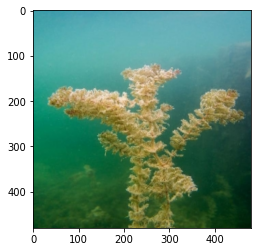

In [ ]:
plt.imshow(clear[1])

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import optimizers
from keras import regularizers
import tensorflow as tf

In [ ]:
dirt=np.array(dirt)
clear=np.array(clear)

In [ ]:
np.shape(dirt)

(201, 480, 480, 3)

In [ ]:
np.shape(clear)

(201, 480, 480, 3)

In [ ]:
input_img = keras.Input(shape=(480, 480, 3))
x=tf.keras.layers.Conv2D(64, (7, 7),strides=(1,1), activation="relu", input_shape=(480, 480, 3),padding='same')(input_img)
x=tf.keras.layers.Conv2D(128,(3,3),strides=(2,2),activation="relu",padding='same')(x)
x=tf.keras.layers.Conv2D(256,(3,3),strides=(2,2),activation="relu",padding='same')(x)

r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(x)

r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)
r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)
r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)
r=tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation="relu",padding='same')(r)

d=tf.keras.layers.Add()([r,x])

d=tf.keras.layers.Conv2DTranspose(128,(3,3),strides=(2,2),activation="relu",padding='same')(d)
d=tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),activation="relu",padding='same')(d)
d=tf.keras.layers.Conv2D(3,(7,7),strides=(1,1),activation="relu",padding='same')(d)


generator = keras.Model(input_img, d)
generator.compile(optimizer='adam', loss='mse')
generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 480, 480, 64  9472        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 240, 240, 12  73856       ['conv2d_18[0][0]']              
                                8)                                                          

In [ ]:
tf.config.run_functions_eagerly(False)


In [ ]:
generator.fit(dirt, clear, epochs=50, batch_size=20)

Epoch 1/50
11/11 [==============================] - 19s 2s/step - loss: 381.7416
Epoch 2/50
11/11 [==============================] - 19s 2s/step - loss: 364.8229
Epoch 3/50
11/11 [==============================] - 19s 2s/step - loss: 396.5562
Epoch 4/50
11/11 [==============================] - 19s 2s/step - loss: 405.2205
Epoch 5/50
11/11 [==============================] - 19s 2s/step - loss: 336.1203
Epoch 6/50
11/11 [==============================] - 19s 2s/step - loss: 385.1858
Epoch 7/50
11/11 [==============================] - 19s 2s/step - loss: 358.0145
Epoch 8/50
11/11 [==============================] - 19s 2s/step - loss: 316.8474
Epoch 9/50
11/11 [==============================] - 19s 2s/step - loss: 305.0593
Epoch 10/50
11/11 [==============================] - 19s 2s/step - loss: 490.0047
Epoch 11/50
11/11 [==============================] - 19s 2s/step - loss: 360.2097
Epoch 12/50
11/11 [==============================] - 19s 2s/step - loss: 320.0564
Epoch 13/50
11/11 [======

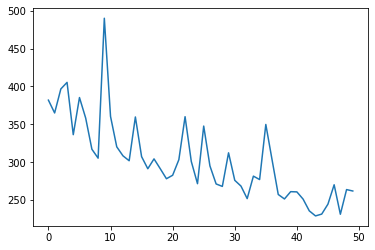

In [ ]:
plt.plot(generator.history.history['loss'])

In [ ]:
var = generator.predict(dirt)

7/7 [==============================] - 18s 1s/step


In [ ]:
from google.colab.patches import cv2_imshow
import random


In [ ]:
def images():
  num = random.random()*200
  n=int(num)
  img = dirt[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb1 = np.dstack((r,g,b))


  img = var[n, :, :, :]
  b=img[:,:,0]
  g=img[:,:,1]
  r=img[:,:,2]
  rgb2 = np.dstack((r,g,b))
  Hori = np.concatenate((rgb1, rgb2), axis=1)

  cv2_imshow(Hori)


In [ ]:
def disp_images(n):
  for i in range(0,n):
    images()

In [ ]:
disp_images(10)

In [ ]:
np.shape(dirt)

In [ ]:
np.shape(clear)

In [ ]:
generator.save('/content/gdrive/MyDrive/sea_model_X.h5')

In [ ]:
generator.save('sea_model_X.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/sea_model_X.h5')

In [ ]:
new_model.summary()

In [ ]:
var = new_model.predict(dirt)